# 猫狗识别 V1

## 数据预处理

### 准备数据

In [11]:
import os, shutil

# 原始数据集解压目录的路径
original_dataset_dir = './dataset/all/train'

# 保存较小的数据集目录
base_dir = './dataset/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# 训练数据目录
train_dir = os.path.join(base_dir,'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

# 验证数据目录
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

# 测试数据目录
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# 猫的训练图像目录
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# 狗的训练图像目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# 猫的验证图像目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# 狗的验证图像目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# 猫的测试集图像目录
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# 狗的测试图像目录
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)


将前1000张**猫**的图像复制到train_cats_dir中

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张猫的图像复制到validation_cats_dir中

In [15]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张猫的图像复制到test_cats_dir中

In [16]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

将前1000张**狗**的图像复制到train_dogs_dir中

In [17]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张狗的图像复制到validaiton_dogs_fir中

In [18]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张狗的图像复制到test_dogs_dir中

In [19]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

查看每个分组(训练/验证/测试)中分别包含多少张图像

In [20]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))


total training cat images:  1000


In [21]:
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

total training dog images:  1000


In [22]:
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))

total validation cat images:  500


## 将猫狗分类问题的小型卷积神经网络实例化

In [27]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))         
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### 配置模型用于训练

In [29]:
from keras import optimizers

In [30]:
model.compile(optimizer = optimizers.RMSprop(lr=1e-4),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


## 数据预处理

* 读取图像文件
* 将JEPG文件解码为RGB像素网格
* 将这些像素网格转换称浮点数张量
* 将像素值(0~255范围内)缩放到[0-1]区间内

### 使用ImageDataGenerator从目录中读取图像

In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 将目标目录下的所有图像的大小调整为150x150
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
for data_batch, label_batch in train_generator:
    print("data batch_shape: ", data_batch.shape)
    print("label batch_shape: ", label_batch.shape)
    break

data batch_shape:  (20, 150, 150, 3)
label batch_shape:  (20,)


### 使用批量生成器拟合模型

In [34]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 30,
                              validation_data = validation_generator,
                              validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 86s 856ms/step - loss: 0.6910 - acc: 0.5475 - val_loss: 0.6737 - val_acc: 0.5970
Epoch 2/30
100/100 [==============================] - 78s 784ms/step - loss: 0.6535 - acc: 0.6155 - val_loss: 0.6555 - val_acc: 0.5960
Epoch 3/30
100/100 [==============================] - 79s 788ms/step - loss: 0.6134 - acc: 0.6585 - val_loss: 0.6151 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 90s 896ms/step - loss: 0.5696 - acc: 0.6935 - val_loss: 0.6310 - val_acc: 0.6530
Epoch 5/30
100/100 [==============================] - 81s 809ms/step - loss: 0.5482 - acc: 0.7180 - val_loss: 0.5822 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 77s 775ms/step - loss: 0.5207 - acc: 0.7380 - val_loss: 0.5612 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 77s 774ms/step - loss: 0.4963 - acc: 0.7590 - val_loss: 0.5623 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 7

**在训练完成后保存模型**

In [35]:
model.save('cats_and_dogs_small_1.h5')

### 绘制训练过程中的损失曲线和精度曲线

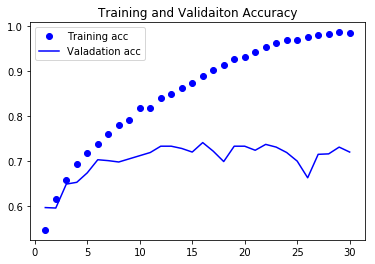

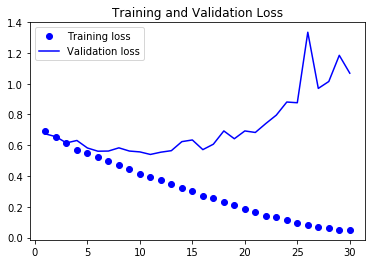

In [37]:
import matplotlib.pyplot as plt

history_list = history.history
acc = history_list['acc']
val_acc = history_list['val_acc']
loss = history_list['loss']
val_loss = history_list['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Valadation acc')
plt.title('Training and Validaiton Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()